### **Introduction**
**Objective:**
To analyze Zomato dataset by performing various operations for determining relationships between features of the dataset.

**Tools Used:**
Pandas, 
Numpy, 
Matplotlib, 
Seaborn

### **Research Questions**
1.	What is the average cost for two people at restaurants in different cities?
2.	How does the aggregate rating vary across different types of cuisines?
3.	Do restaurants which offer online delivery have higher ratings than those that do not?
4.	Are restaurants with table booking options rated higher than those without it?
5.	How do mean average ratings differ across restaurants in various price ranges?
6.	Is there a significant difference in the average cost for two between different localities in a city?
7.	How does the aggregate rating vary between restaurants in different countries?
8.	Is there a significant difference in the number of votes received by restaurants across different cuisines?

### **Data Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
zomato_df=pd.read_csv("zomato.csv",encoding='latin-1')

In [4]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
zomato_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### **Data Dictionary**
| Feature Name                | Description                                              | Type               |
|-----------------------------|----------------------------------------------------------|--------------------|
| Restaurant ID               | Unique identifier for each restaurant                    | Numerical (int64)  |
| Restaurant Name             | Name of the restaurant                                   | Categorical (object)|
| Country Code                | Code representing the country                            | Numerical (int64)  |
| City                        | City where the restaurant is located                     | Categorical (object)|
| Address                     | Street address of the restaurant                         | Categorical (object)|
| Locality                    | Locality of the restaurant                               | Categorical (object)|
| Locality Verbose            | Detailed locality of the restaurant                      | Categorical (object)|
| Longitude                   | Longitude coordinate of the restaurant                   | Numerical (float64)|
| Latitude                    | Latitude coordinate of the restaurant                    | Numerical (float64)|
| Cuisines                    | Types of cuisine served by the restaurant                | Categorical (object)|
| Average Cost for two        | Average cost for a meal for two people                   | Numerical (int64)  |
| Currency                    | Currency used for the price                              | Categorical (object)|
| Has Table booking           | Indicates whether the restaurant has table booking       | Categorical (object)|
| Has Online delivery         | Indicates whether the restaurant offers online delivery  | Categorical (object)|
| Is delivering now           | Indicates whether the restaurant is currently delivering | Categorical (object)|
| Switch to order menu        | Switch option to order menu                              | Categorical (object)|
| Price range                 | Price range of the restaurant in the scale of 1-4        | Numerical (int64)  |
| Aggregate rating            | Overall average rating of the restaurant                 | Numerical (float64)|
| Rating color                | Color representing the rating                            | Categorical (object)|
| Rating text                 | Textual representation of the rating                     | Categorical (object)|
| Votes                       | Number of votes for the restaurant                       | Numerical (int64)  |


### **Data Cleaning**

In [7]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
zomato_df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#Number of outliers
numeric_columns = zomato_df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    Q1 = zomato_df[col].quantile(0.25)
    Q3 = zomato_df[col].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR
    outliers = zomato_df[col][(zomato_df[col] > upper_bound) | (zomato_df[col] < lower_bound)].size
    print(col,": ",outliers)

Restaurant ID :  0
Country Code :  899
Longitude :  1953
Latitude :  1982
Average Cost for two :  853
Price range :  586
Aggregate rating :  2148
Votes :  1126


In [10]:
conversion_rates = {
    'Botswana Pula(P)': 0.073,
    'Brazilian Real(R$)': 0.19,
    'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27,
    'Indian Rupees(Rs.)': 0.012,
    'Indonesian Rupiah(IDR)': 0.000065,
    'NewZealand($)': 0.61,
    'Pounds(£)': 1.37,
    'Qatari Rial(QR)': 0.27,
    'Rand(R)': 0.064,
    'Sri Lankan Rupee(LKR)': 0.0031,
    'Turkish Lira(TL)': 0.037,
}


zomato_df['Standardized Cost (USD)'] = zomato_df['Average Cost for two'] * zomato_df['Currency'].map(conversion_rates)

##### Joining Zomato and Country Dataset

In [11]:
country_code_df=pd.read_excel('./Dataset/Country-Code.xlsx')

In [12]:
country_code_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
zomato_df= pd.merge(zomato_df,country_code_df,on='Country Code',how='left')

In [14]:
zomato_df['Country']

0       Phillipines
1       Phillipines
2       Phillipines
3       Phillipines
4       Phillipines
           ...     
9546         Turkey
9547         Turkey
9548         Turkey
9549         Turkey
9550         Turkey
Name: Country, Length: 9551, dtype: object

### **Answering Research Questions with Visualizations**

1.	What is the average cost for two people at restaurants in different cities?

In [15]:
avg_cost_city_df=zomato_df.groupby(zomato_df['City']).agg({'Currency':'first','Average Cost for two':'mean'})

In [16]:
avg_cost_city_df

,Currency,Average Cost for two
City,,
Abu Dhabi,Emirati Diram(AED),182.000000
Agra,Indian Rupees(Rs.),1065.000000
Ahmedabad,Indian Rupees(Rs.),857.142857
Albany,Dollar($),19.750000
Allahabad,Indian Rupees(Rs.),517.500000
...,...,...
Weirton,Dollar($),25.000000
Wellington City,NewZealand($),71.250000
Winchester Bay,Dollar($),25.000000


In [17]:
conversion_rates = {
    'Botswana Pula(P)': 0.073,
    'Brazilian Real(R$)': 0.19,
    'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27,
    'Indian Rupees(Rs.)': 0.012,
    'Indonesian Rupiah(IDR)': 0.000065,
    'NewZealand($)': 0.61,
    'Pounds(£)': 1.37,
    'Qatari Rial(QR)': 0.27,
    'Rand(R)': 0.064,
    'Sri Lankan Rupee(LKR)': 0.0031,
    'Turkish Lira(TL)': 0.037,
}


avg_cost_city_df['Standardized Cost (USD)'] = avg_cost_city_df['Average Cost for two'] * avg_cost_city_df['Currency'].map(conversion_rates)

In [18]:
sorted_avg_cost_city_df=avg_cost_city_df.sort_values(by='Standardized Cost (USD)',ascending=False)

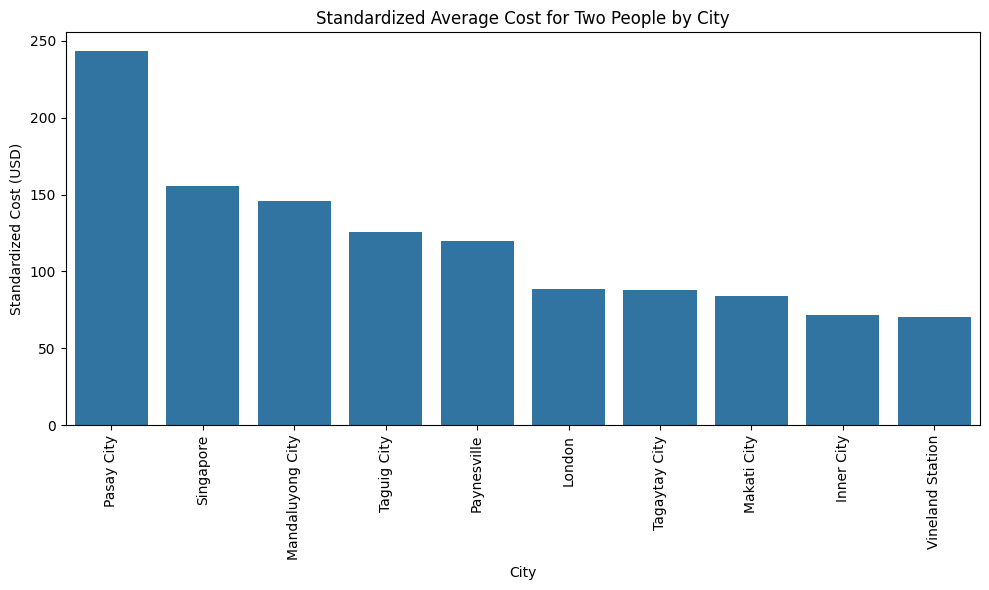

In [19]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=sorted_avg_cost_city_df[:10].index, y=sorted_avg_cost_city_df['Standardized Cost (USD)'][:10])

plt.xticks(rotation=90)

plt.xlabel('City')
plt.ylabel('Standardized Cost (USD)')
plt.title('Standardized Average Cost for Two People by City')

plt.tight_layout()  
plt.show()

2.	How does the aggregate rating vary across different types of cuisines?

In [20]:
mean_cuisine_rating_df= zomato_df.groupby('Cuisines').agg({'Restaurant ID':'count','Aggregate rating':'mean'})
mean_cuisine_rating_df= mean_cuisine_rating_df.sort_values(by='Restaurant ID',ascending=False)

In [21]:
median_cuisine_rating_df= zomato_df.groupby('Cuisines').agg({'Restaurant ID':'count','Aggregate rating':'median'})
median_cuisine_rating_df= median_cuisine_rating_df.sort_values(by='Restaurant ID',ascending=False)

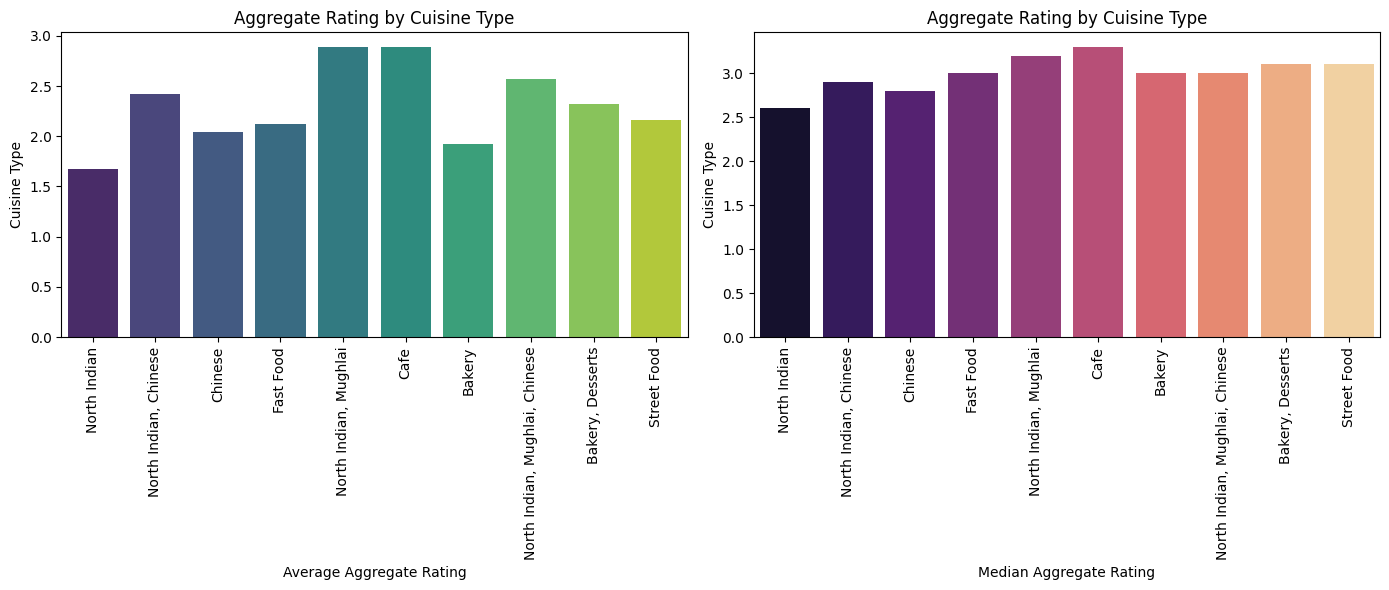

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(y='Aggregate rating', x='Cuisines', data=mean_cuisine_rating_df[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Aggregate Rating by Cuisine Type')
axes[0].set_xlabel('Average Aggregate Rating')
axes[0].set_ylabel('Cuisine Type')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)

sns.barplot(y='Aggregate rating', x='Cuisines', data=median_cuisine_rating_df[:10], palette='magma', ax=axes[1])
axes[1].set_title('Aggregate Rating by Cuisine Type')
axes[1].set_xlabel('Median Aggregate Rating')
axes[1].set_ylabel('Cuisine Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

plt.tight_layout()

plt.show()

3.	Do restaurants which offer online delivery have higher ratings than those that do not?

In [23]:
online_delivery_rating_df = zomato_df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()

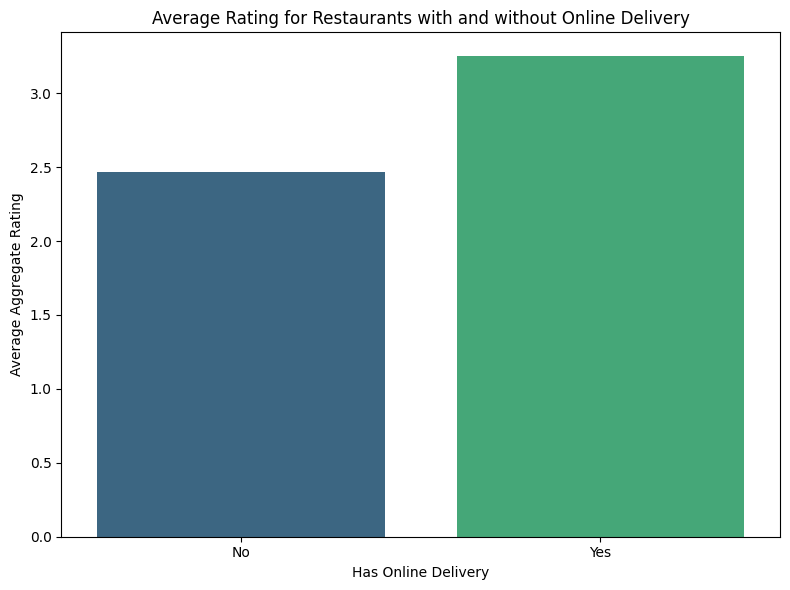

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=online_delivery_rating_df, palette='viridis')

plt.xlabel('Has Online Delivery')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Rating for Restaurants with and without Online Delivery')

plt.tight_layout()
plt.show()

4.	Are restaurants with table booking options rated higher than those without it?

In [25]:
table_booking_rating_df = zomato_df.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()

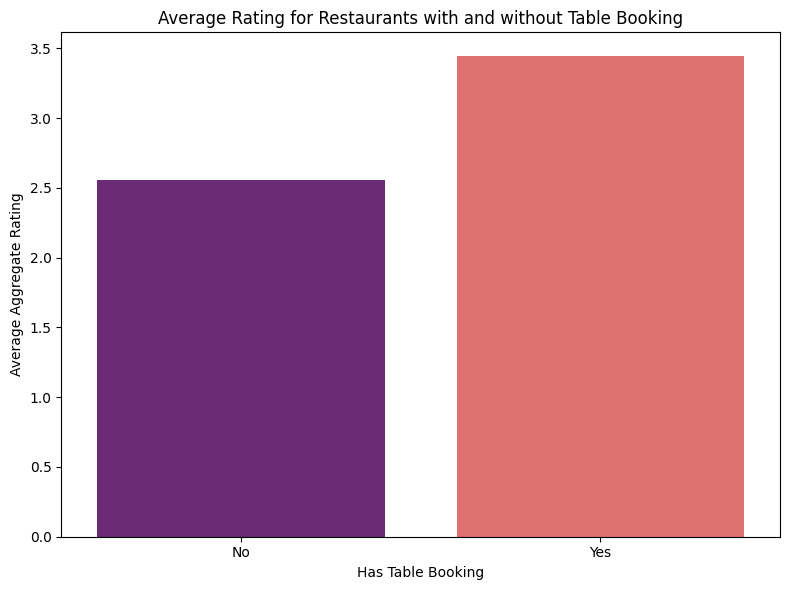

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=table_booking_rating_df, palette='magma')

plt.xlabel('Has Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Rating for Restaurants with and without Table Booking')

plt.tight_layout()
plt.show()

5.	How do mean average ratings differ across restaurants in various price ranges?

In [27]:
price_range_rating_df = zomato_df.groupby('Price range')['Aggregate rating'].mean().reset_index()

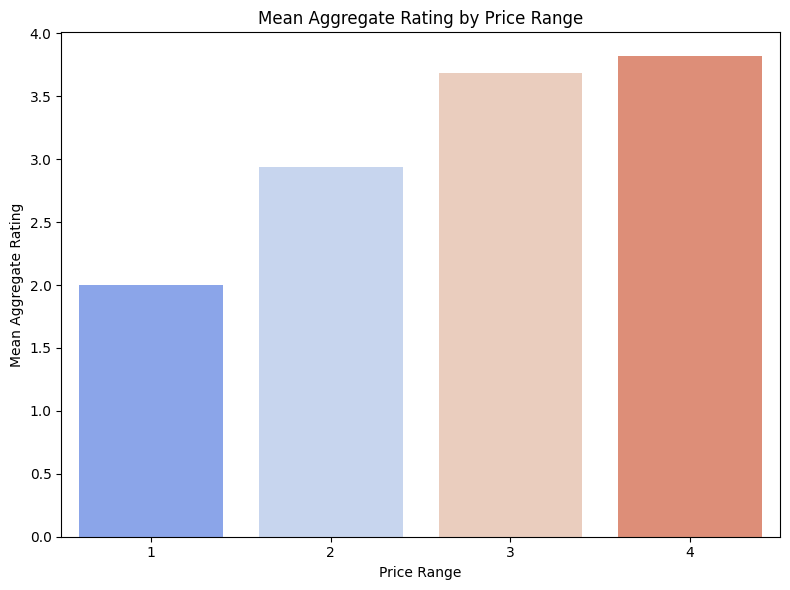

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Price range', y='Aggregate rating', data=price_range_rating_df, palette='coolwarm')

plt.xlabel('Price Range')
plt.ylabel('Mean Aggregate Rating')
plt.title('Mean Aggregate Rating by Price Range')

plt.tight_layout()
plt.show()

6.	Is there a significant difference in the average cost for two between different localities in a city?

In [29]:
locality_cost_df = zomato_df.groupby(['City', 'Locality'])['Standardized Cost (USD)'].mean().reset_index()

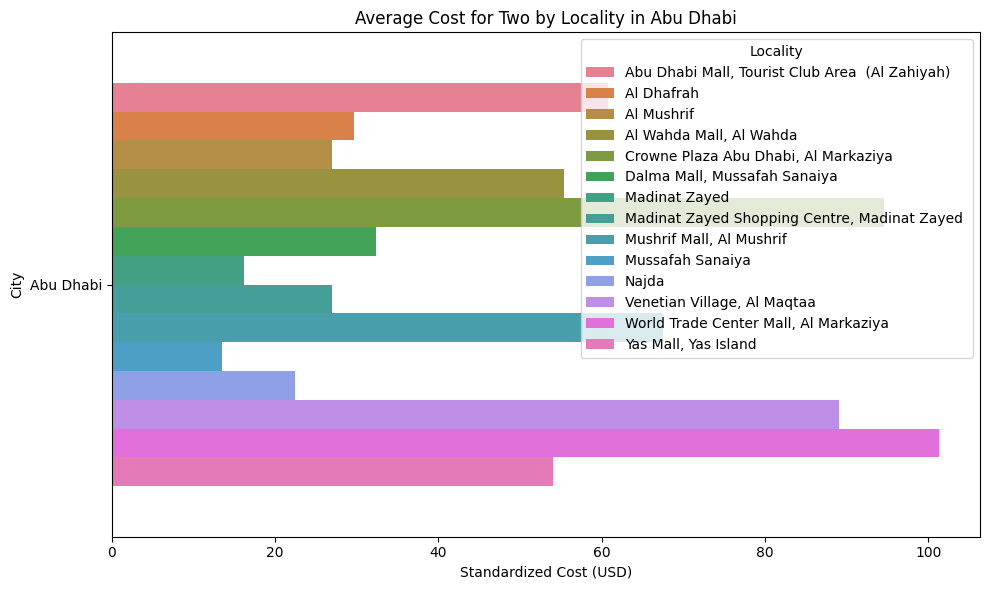

In [30]:
city_locality_df = locality_cost_df[locality_cost_df['City'] == 'Abu Dhabi']

plt.figure(figsize=(10, 6))
sns.barplot(x='Standardized Cost (USD)', y='City', data=city_locality_df, hue='Locality')

plt.xlabel('Standardized Cost (USD)')
plt.ylabel('City')
plt.title('Average Cost for Two by Locality in Abu Dhabi')

plt.tight_layout()
plt.show()

7.	How does the aggregate rating vary between restaurants in different countries?

In [31]:
country_rating_df = zomato_df.groupby('Country')['Aggregate rating'].mean().reset_index()
country_rating_df=country_rating_df.sort_values(by='Aggregate rating')

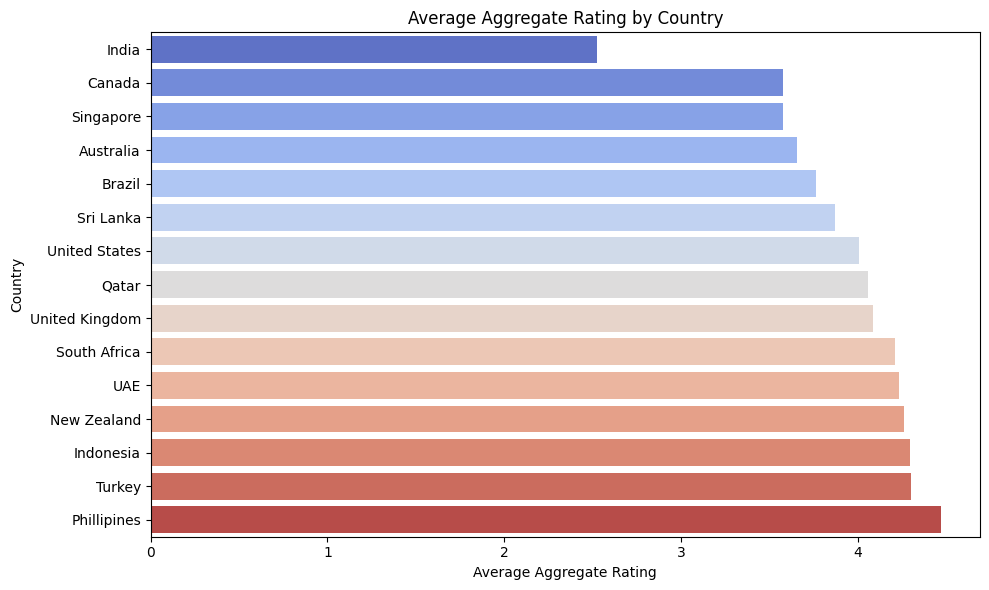

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Aggregate rating', y='Country', data=country_rating_df, palette='coolwarm')

plt.xlabel('Average Aggregate Rating')
plt.ylabel('Country')
plt.title('Average Aggregate Rating by Country')

plt.tight_layout()
plt.show()

8. Is there a significant difference in the number of votes received by restaurants across different cuisines?

In [33]:
cuisine_votes_df = zomato_df.groupby('Cuisines')['Votes'].mean().reset_index()
cuisine_votes_df = cuisine_votes_df.sort_values(by='Votes', ascending=False)

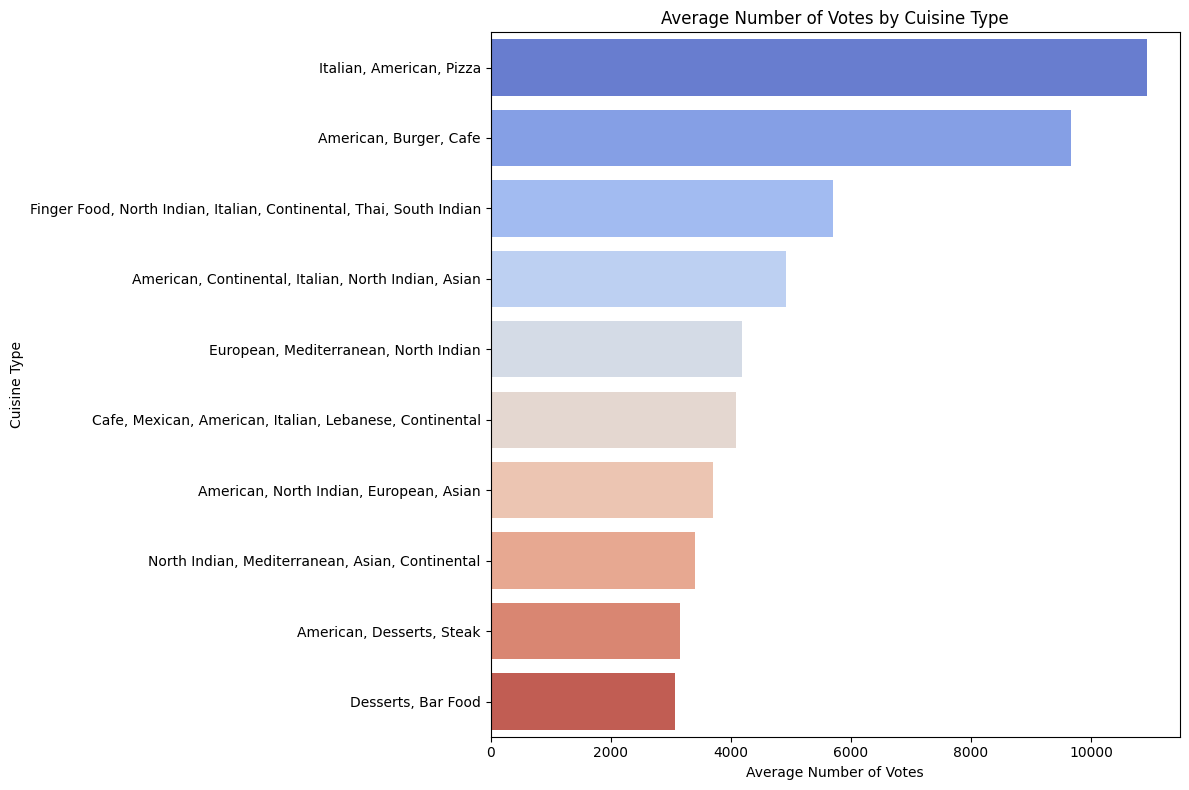

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes_df[:10], palette='coolwarm')

plt.xlabel('Average Number of Votes')
plt.ylabel('Cuisine Type')
plt.title('Average Number of Votes by Cuisine Type')

plt.tight_layout()
plt.show()

### **7. Interpretation of Results**
1. Cities like Pasay City and Singapore have significantly higher average cost for two after standardizing the currency than other. This can mean that restaurants in popular tourist destinations typically have higher prices.

2. Cuisines like North Indian, Cafe, Mughlai and Chinese which are available in a large number of restaurants have average rating higher than other cuisines. Consistency in the mean and median aggregate ratings indicates the reliability of customer reviews for these cuisines.

3. The average rating of restaurants that deliver food online is somewhat higher than that of restaurants that don't which might be because online delivery provides an extra level of convenience.

4. The ability to reserve a table is linked to a superior eating experience which may improve consumer satisfaction.

5. Price range and aggregate rating have a positive correlation, indicating that visitors of more expensive restaurants believe they are getting greater value.

6. In Abu Dhabi, the average price for two varies greatly depending on the neighborhood, with certain areas having higher prices than others.

7. In comparison to other nations like India and Canada, the United Arab Emirates, New Zealand and Turkey often have higher overall ratings.

8. A lot more people vote for well-known global foods like Italian, Chinese and Japanese than for less well-known cuisines. This means that these types of food have more customers and more engagement.

### **8. Conclusion**
* Higher-priced restaurants tend to have better ratings, indicating that customers might associate price with quality and value.

* Foods that are popular around the world, like Italian, Chinese, and Japanese, tend to get better ratings and more engagement from consumers.

* Online delivery and table booking restaurants have higher ratings, showing convenience boosts customer satisfaction.

* Restaurant prices and reviews vary widely by city, locality and country, possibly due to economic and cultural factors.

* The difference in ratings between restaurants with and without online delivery or table reservations was smaller than expected. These features may increase customer happiness, however food quality and service are more important in rating.